## This project is an exploratory analysis of major bank stocks from 2006-2016, 
## covering the 2008 recession


In [1]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
sns.set()
sns.set_style('whitegrid')
import matplotlib.pyplot as plt
import plotly.graph_objs as go 
import plotly as px
from plotly.offline import init_notebook_mode,iplot
import cufflinks as cf
cf.go_offline()
init_notebook_mode(connected=True) 
%matplotlib inline

import yfinance as yf
yf.pdr_override()

## This financial data has been acquired from yahoo finance using the yfinance python library:

In [2]:
start= dt.datetime(2006,1,1)
end = dt.datetime(2016,1,1)
 
# Bank of America
BAC = data.get_data_yahoo('BAC', start, end)

# CitiGroup
C = data.get_data_yahoo('C', start, end)
 
# Goldman Sachs
GS = data.get_data_yahoo('GS', start, end)
 
# JPMorgan Chase
JPM = data.get_data_yahoo('JPM', start, end)
 
# Morgan Stanley
MS = data.get_data_yahoo('MS', start, end)
 
# Wells Fargo
WF = data.get_data_yahoo('WFC', start, end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


**Creating an array to map the bank tickers:**

In [3]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

**Creating the DataFrame:**

In [4]:
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WF], axis = 1, keys = tickers)
bank_stocks.head()

BAC                                                        \
                 Open       High        Low      Close  Adj Close    Volume   
Date                                                                          
2006-01-03  46.919998  47.180000  46.150002  47.080002  32.695656  16296700   
2006-01-04  47.000000  47.240002  46.450001  46.580002  32.348442  17757900   
2006-01-05  46.580002  46.830002  46.320000  46.639999  32.390087  14970700   
2006-01-06  46.799999  46.910000  46.349998  46.570000  32.341461  12599800   
2006-01-09  46.720001  46.970001  46.360001  46.599998  32.362309  15619400   

                     C                                      ...         MS  \
                  Open        High         Low       Close  ...        Low   
Date                                                        ...              
2006-01-03  490.000000  493.799988  481.100006  492.899994  ...  56.740002   
2006-01-04  488.600006  491.000000  483.500000  483.799988  ...  58.349998   
2006-01-05  484.399994  487.799988  484.000000  486.200012  ...  58.020000   
2006-01-06  488.799988  489.000000  482.000000  486.200012  ...  58.049999   
2006-01-09  486.000000  487.399994  483.000000  483.899994  ...  58.619999   

                                                 WFC                        \
                Close  Adj Close   Volume       Open       High        Low   
Date                                                                         
2006-01-03  58.310001  34.310356  5377000  31.600000  31.975000  31.195000   
2006-01-04  58.349998  34.333900  7977800  31.799999  31.820000  31.365000   
2006-01-05  58.509998  34.428024  5778000  31.500000  31.555000  31.309999   
2006-01-06  58.570000  34.463337  6889800  31.580000  31.775000  31.385000   
2006-01-09  59.189999  34.828156  4144500  31.674999  31.825001  31.555000   

                                            
                Close  Adj Close    Volume  
Date                                        
2006-01-03  31.900000  19.695116  11016400  
2006-01-04  31.530001  19.466679  10870000  
2006-01-05  31.495001  19.445070  10158000  
2006-01-06  31.680000  19.559290   8403800  
2006-01-09  31.674999  19.556202   5619600  

[5 rows x 36 columns]

In [5]:
bank_stocks.columns.names = ['BankTicker','StockInfo']

In [6]:
bank_stocks.head()

BankTicker        BAC                                                        \
StockInfo        Open       High        Low      Close  Adj Close    Volume   
Date                                                                          
2006-01-03  46.919998  47.180000  46.150002  47.080002  32.695656  16296700   
2006-01-04  47.000000  47.240002  46.450001  46.580002  32.348442  17757900   
2006-01-05  46.580002  46.830002  46.320000  46.639999  32.390087  14970700   
2006-01-06  46.799999  46.910000  46.349998  46.570000  32.341461  12599800   
2006-01-09  46.720001  46.970001  46.360001  46.599998  32.362309  15619400   

BankTicker           C                                      ...         MS  \
StockInfo         Open        High         Low       Close  ...        Low   
Date                                                        ...              
2006-01-03  490.000000  493.799988  481.100006  492.899994  ...  56.740002   
2006-01-04  488.600006  491.000000  483.500000  483.799988  ...  58.349998   
2006-01-05  484.399994  487.799988  484.000000  486.200012  ...  58.020000   
2006-01-06  488.799988  489.000000  482.000000  486.200012  ...  58.049999   
2006-01-09  486.000000  487.399994  483.000000  483.899994  ...  58.619999   

BankTicker                                       WFC                        \
StockInfo       Close  Adj Close   Volume       Open       High        Low   
Date                                                                         
2006-01-03  58.310001  34.310356  5377000  31.600000  31.975000  31.195000   
2006-01-04  58.349998  34.333900  7977800  31.799999  31.820000  31.365000   
2006-01-05  58.509998  34.428024  5778000  31.500000  31.555000  31.309999   
2006-01-06  58.570000  34.463337  6889800  31.580000  31.775000  31.385000   
2006-01-09  59.189999  34.828156  4144500  31.674999  31.825001  31.555000   

BankTicker                                  
StockInfo       Close  Adj Close    Volume  
Date                                        
2006-01-03  31.900000  19.695116  11016400  
2006-01-04  31.530001  19.466679  10870000  
2006-01-05  31.495001  19.445070  10158000  
2006-01-06  31.680000  19.559290   8403800  
2006-01-09  31.674999  19.556202   5619600  

[5 rows x 36 columns]

# Cross sectional analysis:

In [7]:
for i in tickers:
    close_max = bank_stocks[i]['Close'].max()
    print(f'Bank: {i} | Max Closing Price: {close_max}\n')

Bank: BAC | Max Closing Price: 54.900001525878906

Bank: C | Max Closing Price: 564.0999755859375

Bank: GS | Max Closing Price: 247.9199981689453

Bank: JPM | Max Closing Price: 70.08000183105469

Bank: MS | Max Closing Price: 89.30000305175781

Bank: WFC | Max Closing Price: 58.52000045776367



In [8]:
#found another method of doing this:
bank_stocks.xs(key = 'Close', axis =1, level = 'StockInfo').max()

BankTicker
BAC     54.900002
C      564.099976
GS     247.919998
JPM     70.080002
MS      89.300003
WFC     58.520000
dtype: float64

**Creating a new DataFrame for the returns of the stocks. The formula is as follows:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [9]:
returns = pd.DataFrame()   

In [10]:
#The built in Pandas function .pct_chancge() returns the returns value

for i in tickers:
    returns[i+' Returns'] = bank_stocks[i]['Close'].pct_change()
    
returns.head()

,BAC Returns,C Returns,GS Returns,JPM Returns,MS Returns,WFC Returns
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


**Creating a plot matrix for the stock returns:**

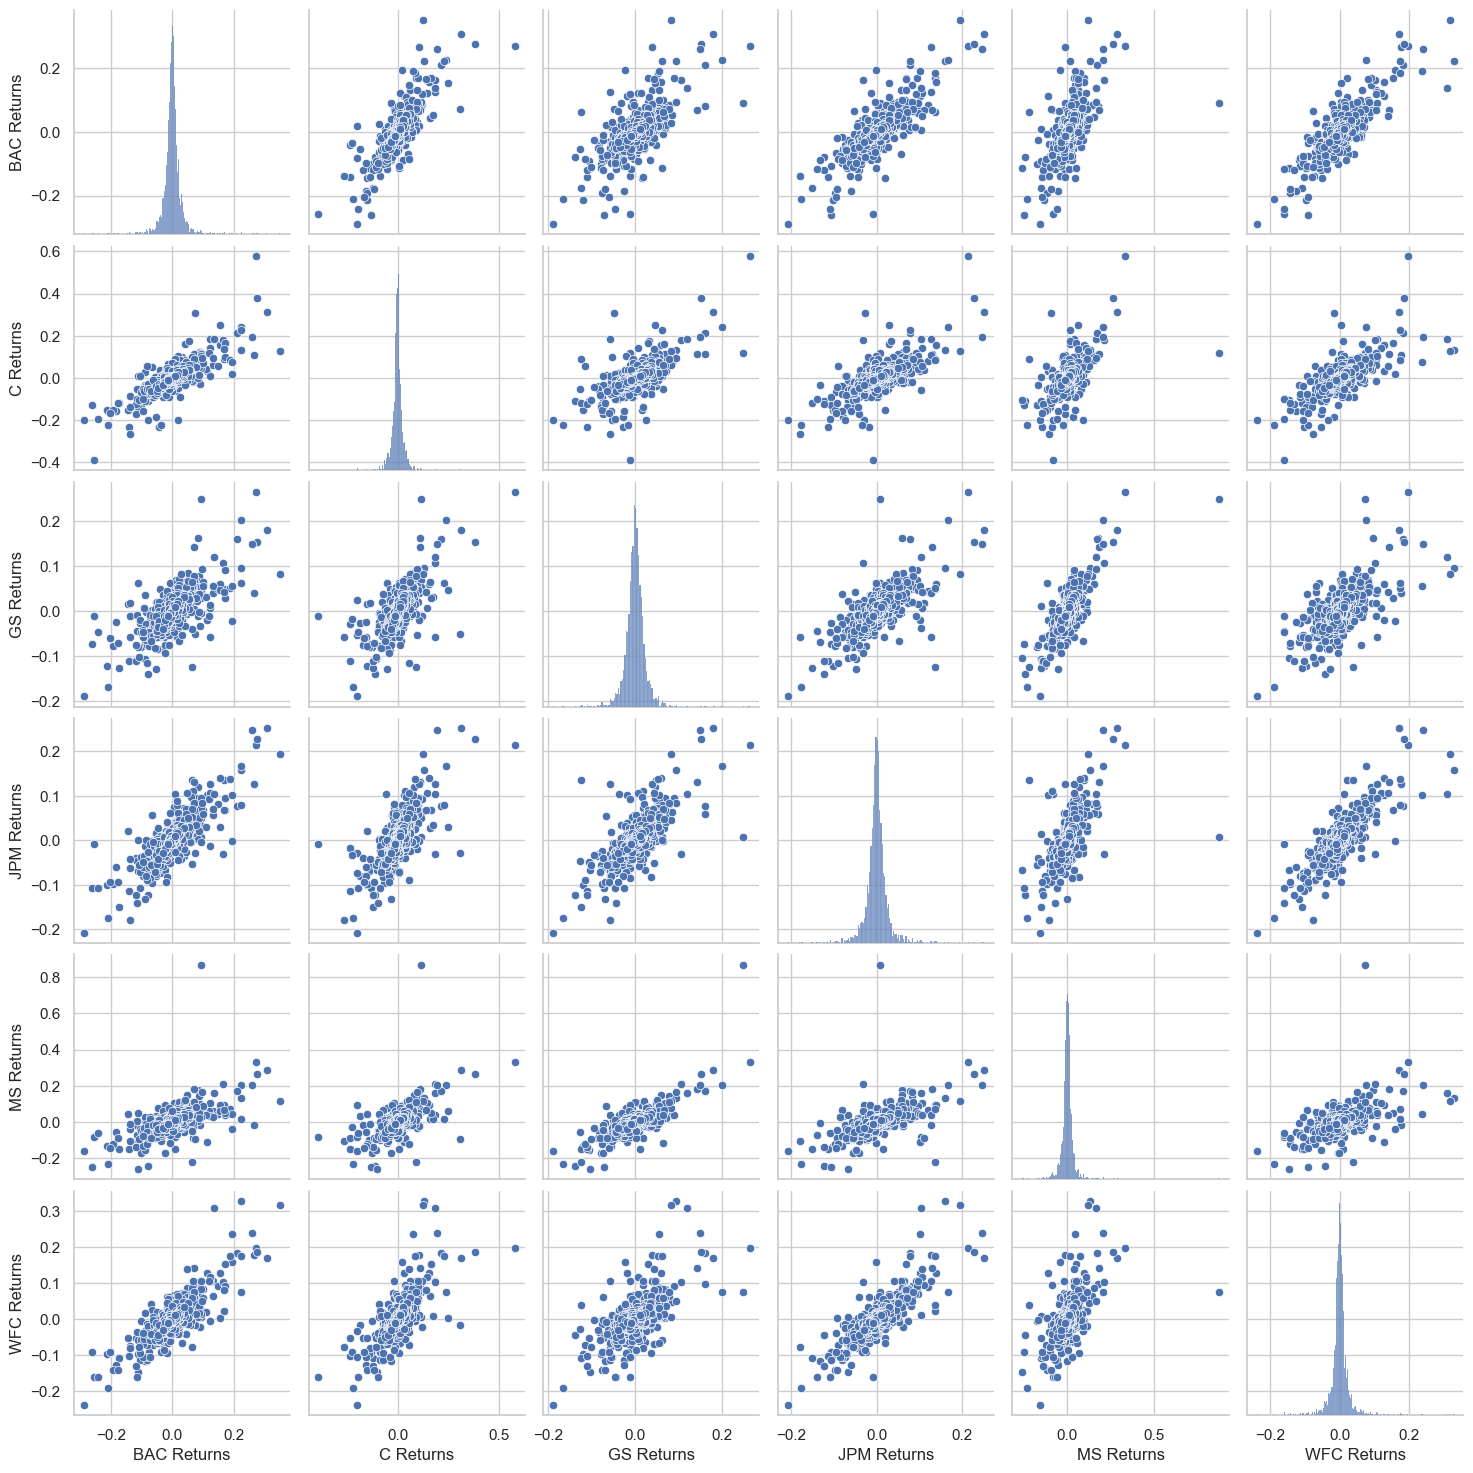

In [11]:
sns.pairplot(data = returns[1:])
#starting at index 1 to exclude the Nan row

**Worst day for each stock:**

In [12]:
#Worst day
returns.idxmin()

BAC Returns   2009-01-20
C Returns     2009-02-27
GS Returns    2009-01-20
JPM Returns   2009-01-20
MS Returns    2008-10-09
WFC Returns   2009-01-20
dtype: datetime64[ns]

**Best day for each stock:**

In [13]:
#Best Day
returns.idxmax()

BAC Returns   2009-04-09
C Returns     2008-11-24
GS Returns    2008-11-24
JPM Returns   2009-01-21
MS Returns    2008-10-13
WFC Returns   2008-07-16
dtype: datetime64[ns]

**JPM and MS both had their worst and best returns on very close dates.**

**Using Standard deviation to determine stock risk:**

In [14]:
#over the entire period:
returns.std()

#citigroup is the riskiest bank stock here

BAC Returns    0.036647
C Returns      0.038672
GS Returns     0.025390
JPM Returns    0.027667
MS Returns     0.037819
WFC Returns    0.030238
dtype: float64

**Citigroup is the riskiest bank stock here.**

In [15]:
returns.min()
#citigroup also had the worst returns out of these banks, so it is the most risky in this time period.

BAC Returns   -0.289694
C Returns     -0.390244
GS Returns    -0.189596
JPM Returns   -0.207274
MS Returns    -0.258929
WFC Returns   -0.238223
dtype: float64

**Citigroup also had the worst returns out of these banks, so it is the most risky in this time period.**

In [16]:
#in 2015:

returns.loc['2015-01-01':'2015-12-31'].std()

#here the banks had similar risks

BAC Returns    0.016163
C Returns      0.015289
GS Returns     0.014046
JPM Returns    0.014017
MS Returns     0.016249
WFC Returns    0.012591
dtype: float64

**2015 Distribution for the returns of the Morgan Stanley bank stock:**

<Figure size 400x400 with 0 Axes>

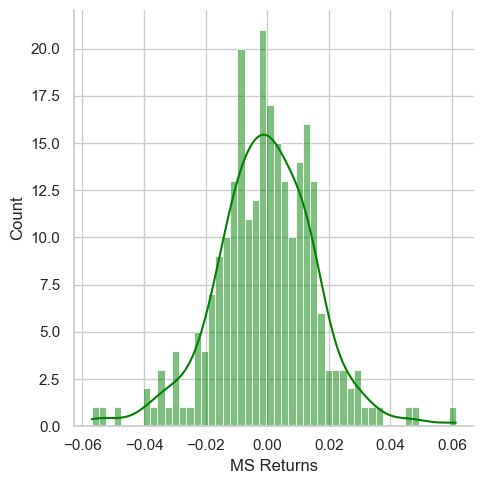

In [17]:
plt.figure(figsize = (4,4))
sns.displot(data = returns.loc['2015-01-01':'2015-12-31'], x = 'MS Returns', kde = True, color = 'green', bins = 50)

**Distribution plot of the 2008 returns for CitiGroup:**

<Figure size 400x400 with 0 Axes>

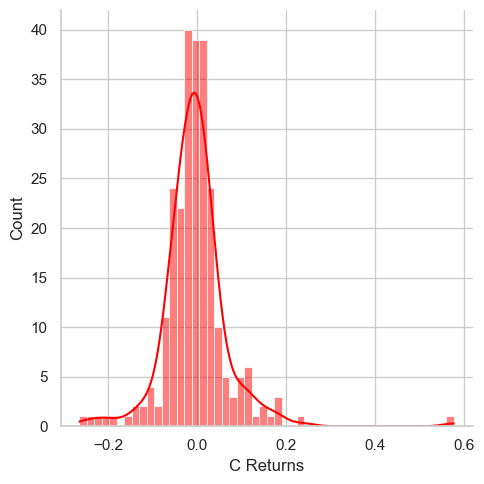

In [18]:
plt.figure(figsize = (4,4))
sns.displot(data = returns.loc['2008-01-01':'2008-12-31'], x = 'C Returns', kde = True, color = 'red', bins = 50)

## Close price of all Bank Stock, from 2006-2016:

In [19]:
#interactive plot

plt.figure(figsize = (12,4))

bank_stocks.xs(key = 'Close', axis = 1, level = 'StockInfo').iplot(title='Bank Stock Closing Prices', 
                                                                   xTitle='Dates', 
                                                                   yTitle='Closing Prices')

plt.show()

<Figure size 1200x400 with 0 Axes>

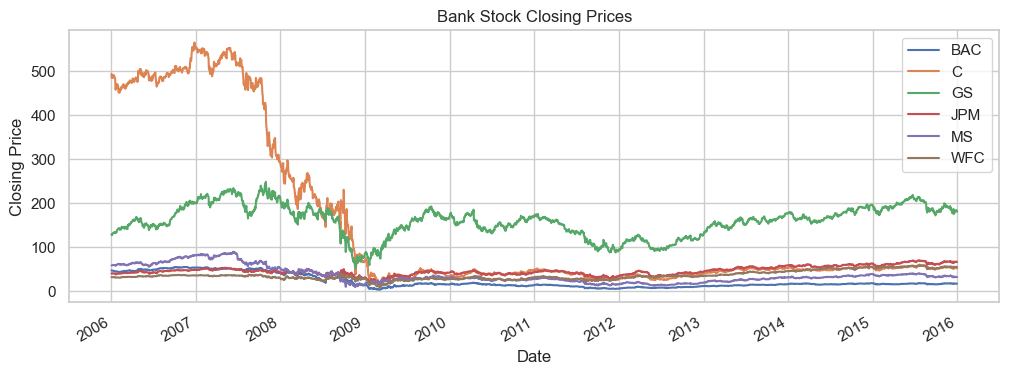

In [20]:
# non-interactive plot:
plt.figure(figsize=(12,4))

for i in tickers:
    bank_stocks[i]['Close'].plot(label = i)

plt.title('Bank Stock Closing Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()


## Moving Averages

Let's analyze the moving averages for these stocks in the year 2008. 

**Bank of America stock throughout 2008, including a 30 day Simple Moving Average:**

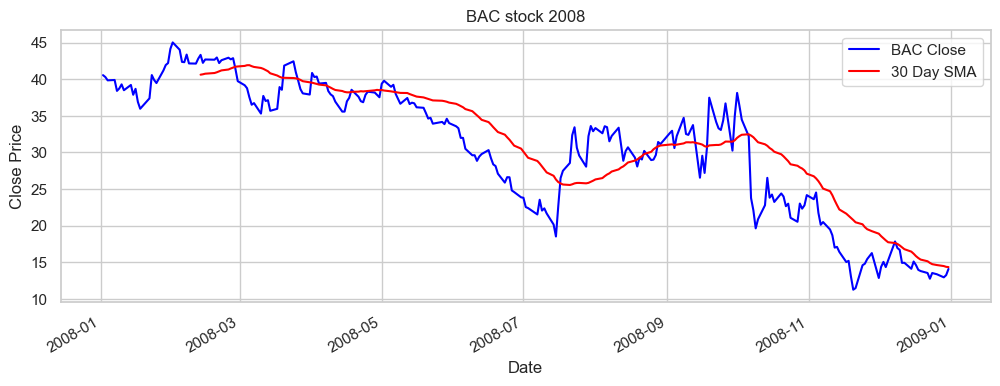

In [21]:
bank_stocks_2008 = bank_stocks.loc['2008-01-01':'2008-12-31']
BAC_2008 = BAC.loc['2008-01-01':'2008-12-31']

plt.figure(figsize=(12,4))
BAC_2008['Close'].plot(label = 'BAC Close', color = 'Blue')
bank_stocks_2008['BAC']['Close'].rolling(window=30).mean().plot(label = '30 Day SMA', color = 'red')

plt.title('BAC stock 2008')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

**Notice the poor performance of Bank of America's stock in 2008, as it closed below its SMA30 most of the year.**

**Creating a heat map between the stock tickers and their close prices:**

<Axes: xlabel='BankTicker', ylabel='BankTicker'>

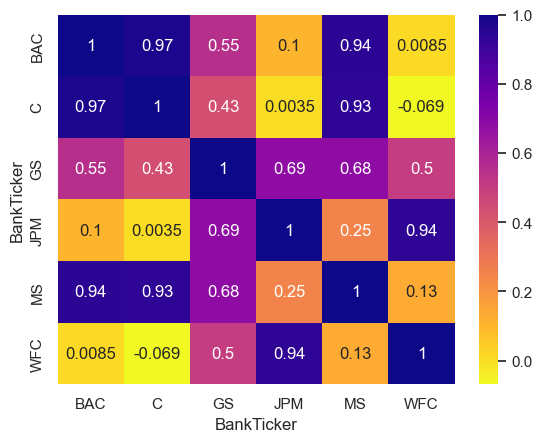

In [22]:
sns.heatmap(data = bank_stocks.xs(key='Close', axis=1,level = 'StockInfo' ).corr(),annot = True, cmap = 'plasma_r')

**Creating a clustermap of the same data:**

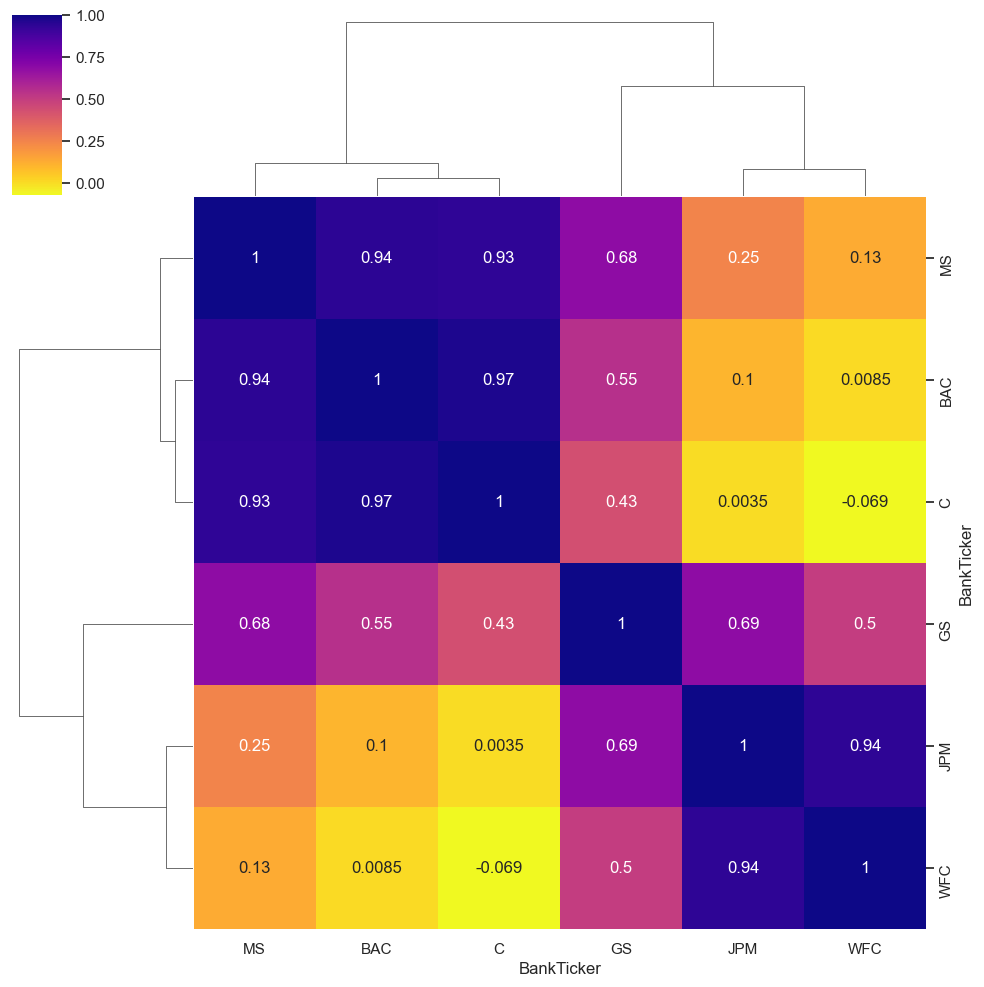

In [23]:
sns.clustermap(data = bank_stocks.xs(key='Close', axis=1,level = 'StockInfo' ).corr(),annot = True, cmap = 'plasma_r')

# Using the cufflinks project in order to produce candlestick charts:

In [24]:
BAC_2015 = BAC.loc['2015-01-01':'2016-01-01']

BAC_2015.iplot(kind = 'candle', title='BAC stock (2015)', xTitle='Dates', yTitle='Closing Prices')

**Demonstrating technical analysis indicators:**

In [25]:
MS_2015_Close = MS.loc['2015-01-01':'2016-01-01']['Close']

MS_2015_Close.ta_plot(study='rsi',periods = 30, title='MS stock RSI and Close Prices', xTitle='Dates',  yTitle='Closing Prices')

**SMA:**

In [26]:
MS_2015_Close = MS.loc['2015-01-01':'2016-01-01']['Close']

MS_2015_Close.ta_plot(study='sma',periods = 30, title='MS stock SMA (2015)', xTitle='Dates',  yTitle='Closing Prices')

**Bollinger Bands:**

In [27]:
BAC_2015['Close'].ta_plot(study='boll',periods = 30, title='BAC stock Bollinger Bands (2015)',
                          xTitle='Dates',  
                          yTitle='Closing Prices')